**Задание**
1. Вычислите градиент функции $Q$ (попробуйте провести выкладки для отдельной строки $w_i$).
2. Обучите модель с помощью градиентного спуска на выборке [mnist](https://www.kaggle.com/c/digit-recognizer) (вы можете применить свою любимую вариацию метода).
3. Вычислите качество на отоженной выборке.

#### 1. Вычислим градиент:

Для начала перепишем формулу $Q$ так:

$$
  Q(W) =
  -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)) =
  -\frac{1}{\mathcal{l}}\sum\limits_{x, y}\sum_i [y = i] \cdot \ln(\mathrm{softmax}(Wx)_i)
$$

Заметим, что сумма по $i$ состоит из нулей и единственного ненулевого слагаемого --- того, где $i = y$. Значит, мы можем упростить выражение:

$$
  Q(W) =
  -\frac{1}{\mathcal{l}}\sum\limits_{x, y} \cdot \ln(\mathrm{softmax}(Wx)_y)
$$

Теперь попробуем найти градиент. Т.к. мы ищем градиент функции, переводящей матрицу в скаляр, градиент представляет из себя матрицу той же размерности, что и $W$. Найдём её $ij$-ый элемент:

$$
  \left(\frac{dQ}{dW}\right)_{ij} =
  \frac{dQ}{dW_{ij}} =
  \frac{dQ}{dw_i} \cdot
  \frac{dw_i}{dW_{ij}}
$$

Начнём с простого и поймём, что из себя представляет $\frac{dw_i}{dW_{ij}}$. Для простоты посчитаем по определению:

$$
  \lim\limits_{\Delta W_{ij} \to 0} \frac{(W_{i1}, \ldots, W_{ij}, \ldots, W_{in}) - (W_{i1}, \ldots, W_{ij}+\Delta W_{ij}, \ldots, W_{in})}{\Delta W_{ij}} =
  \lim\limits_{\Delta W_{ij} \to 0} \frac{(0, \Delta W_{ij}, \ldots, 0)}{\Delta W_{ij}} = (\underbrace
  {0, \ldots,}_{j-1} 1, \ldots, 0)
$$

Отлично. Теперь заметим, что так как $ij$-ый элемент матрицы градиента --- лишь $j$-ый элемент производной по $i$-ой строке, можно просто считать градиент построчно, т.е.

$$
  \frac{dQ}{dW} =
  \begin{pmatrix}
    \frac{dQ}{dw_1}\\
    \vdots\\
    \frac{dQ}{dw_k}\\
    \vdots\\
    \frac{dQ}{dw_n}\\
  \end{pmatrix}
$$

Найдём производную по строке:

$$
  \frac{dQ}{dw_k} =
  -\frac{1}{l}\sum\limits_i\frac{1}{\mathrm{softmax}(Wx^i)_{y_i}}\cdot\frac{d\mathrm{softmax}(Wx^i)_{y_i}}{dw_k} =
  \begin{cases}
    \frac{d}{dw_k} \frac{e^{w_yx^k}}{\sum\limits_j e^{w_jx^j}},&k \neq y\\
    \frac{d}{dw_k} \frac{e^{w_kx^k}}{\sum\limits_j e^{w_jx^j}},&k = y
  \end{cases} =
  \begin{cases}
    e^{w_yx^k}
    \frac{d}{dw_k} \frac{1}{\sum\limits_j e^{w_jx^j}},&k \neq y\\
    \frac{x^k e^{w_kx^k}\sum e^{w_jx^j} - e^{w_kx^k} x^ke^{w_kx^k}}{\left(\sum e^{w_jx^j}\right)^2},&k = y
  \end{cases} =
  \begin{cases}
    e^{w_yx^k}
    \frac{-1}{\left(\sum e^{w_jx^j}\right)^2}\cdot\frac{d}{dw_k}\sum e^{w_jx^j},&k \neq y\\
    \frac{x^k e^{w_kx^k}\left(\sum e^{w_jx^j} - e^{w_kx^k} \right)}{\left(\sum e^{w_jx^j}\right)^2},&k = y
  \end{cases} =
  \begin{cases}
    e^{w_yx^k}
    \frac{-1}{\left(\sum e^{w_jx^j}\right)^2}\cdot x^ke^{w_kx^k},&k \neq y\\
    x^k \frac{e^{w_kx^k}}{\sum e^{w_jx^j}}\cdot\left(1-\frac{e^{w_kx^k}}{\sum e^{w_jx^j}}\right),&k = y
  \end{cases} =
  \begin{cases}
    -x^k\frac{e^{w_yx^k}}{\sum e^{w_jx^j}}\cdot\frac{e^{w_kx^k}}{\sum e^{w_jx^j}},&k \neq y\\
    -x^k \frac{e^{w_kx^k}}{\sum e^{w_jx^j}}\cdot\left(\frac{e^{w_kx^k}}{\sum e^{w_jx^j}} - 1\right),&k = y
  \end{cases} =
  \begin{cases}
    -x^k \frac{e^{w_yx^k}}{\sum e^{w_jx^j}}\cdot\frac{e^{w_kx^k}}{\sum e^{w_jx^j}},&k \neq y\\
    -x^k \frac{e^{w_yx^k}}{\sum e^{w_jx^j}}\cdot\left(\frac{e^{w_kx^k}}{\sum e^{w_jx^j}} - 1\right),&k = y
  \end{cases} = -x^k \frac{e^{w_yx^k}}{\sum e^{w_jx^j}}\cdot\left(\frac{e^{w_kx^k}}{\sum e^{w_jx^j}} - \delta_{ky}\right)
$$

Здесь $\delta$ --- символ Кронекера, принимающий значение 1 при равенстве индексов. Упростим выражение ещё сильнее:

Введём матрицу $\mathrm{softmax}(XW) = \begin{pmatrix}\mathrm{softmax}(x_1W)\\\vdots\\\mathrm{softmax}(x_iW)\\\vdots\\\mathrm{softmax}(x_nW)\end{pmatrix}$ и матрицу $\delta_y = (\delta_{y_ij})_{ij}$, т.е. столбец строк, где единица стоит только на месте, соответствующем номеру класса. Тогда всё выражение упрощается до

$$
  \frac{dQ}{dW} = \frac{1}{l}X^T(\mathrm{softmax}(XW) - \delta_y)
$$

#### 2. Обучим сеть:

Сначала все базовые приготовления:

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
digits = X_train.reshape((60000, 784))
test_digits = X_test.reshape((10000, 784))
digits = digits.astype('float32')
test_digits = test_digits.astype('float32')
digits /= 255
test_digits /= 255
classes_num = 10

labels = to_categorical(y_train, classes_num)
test_labels = to_categorical(y_test, classes_num)

In [3]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

Воспользуемся Adam'ом из прошлой лабораторной:

In [4]:
def adam(grad, points, labels, learning_rate, decay_first, decay_second, batch_size, passes, start_point):
    first_moment = np.zeros((points.shape[1], 10))
    second_moment = np.zeros((points.shape[1], 10))
    curr_point = start_point
    interm_sequence = np.array(start_point)

    batch_num = (points.shape[0]-1) // batch_size + 1
    
    step = 0
    for i in range(passes):
        for j in range(batch_num):
            step += 1

            curr_grad = grad(curr_point, j, batch_size)
            first_moment = decay_first*first_moment + (1-decay_first)*curr_grad
            bias_corr_first = first_moment/(1-decay_first**step)
            
            second_moment = decay_second*second_moment + (1-decay_second)*curr_grad**2       
            bias_corr_second = second_moment/(1-decay_second**step)

            curr_point -= learning_rate*bias_corr_first/(np.sqrt(bias_corr_second)+1e-8)

    return curr_point

Теперь реализуем вычисление градиента и прочие полезные вещи:

In [5]:
def MNIST_Q(curr_point):
    return -1/digits.shape[0]*sum(np.log(softmax(x @ curr_point)[y]+1e-10) for x, y in zip(digits, y_train))

def MNIST_grad(curr_point, batch_num, batch_size):
    curr_slice = slice(batch_num*batch_size, min((batch_num+1)*batch_size, digits.shape[0]))
    raw = digits[curr_slice] @ curr_point
    return 1/batch_size * digits[curr_slice].T @ (np.vstack([softmax(raw[i]) for i in range(raw.shape[0])]) - labels[curr_slice])

def predict(matrix, digit):
    raw = digit @ matrix;
    return softmax(raw)

def accuracy_check(classifier, test_points, test_labels):
    correct_count = 0
    for i in range(test_digits.shape[0]):
        guess = np.argmax(predict(classifier, test_points[i]))
        correct_count += (guess == np.argmax(test_labels[i]))
    return correct_count/test_points.shape[0]

Теперь можно и обучать. Но обучать наугад неинтересно и неэффективно, поэтому попробуем найти оптимальное значение:

In [6]:
optimal_learn_rate = (0, 0)
for i in np.arange(-8, 1, 0.3):
    print(i, end="... ")
    classifier = adam(
        MNIST_grad,
        digits,
        labels,
        10**i,
        0.9,
        0.999,
        501,
        10,
        np.zeros((digits.shape[1], 10))
    )
    accuracy = accuracy_check(classifier, test_digits, test_labels)
    if accuracy > optimal_learn_rate[1]:
        optimal_learn_rate = (i, accuracy)

-8.0... -7.7... -7.4... -7.1... -6.8... -6.5... -6.2... -5.9... -5.6... -5.3... -5.0... -4.7... -4.4... -4.1... -3.8... -3.5... -3.2... -2.9... -2.6... -2.3... -2.0... -1.7... -1.4... -1.1... -0.8... -0.5... -0.2... 0.1... 0.4... 0.7... 

In [7]:
classifier = adam(
    MNIST_grad,
    digits,
    labels,
    10**optimal_learn_rate[0],
    0.9,
    0.999,
    500,
    10,
    np.zeros((digits.shape[1], 10))
)

Оценим точность:

In [8]:
print(accuracy_check(classifier, test_digits, test_labels))

0.925


92.5% --- довольно неплохо для простой однослойной сети!

**Задание**
1. Как стоит подбирать значения $\lambda_1$ и $\lambda_2$?
2. Удалось ли улучшить $Q$ на отложенной выборке?

Для начала реализуем градиент регуляризованной функции ошибки. Он довольно простой, т.к. функции базовые:

In [9]:
def MNIST_grad_reg(curr_point, batch_num, batch_size, l_1, l_2):
    curr_slice = slice(batch_num*batch_size, min((batch_num+1)*batch_size, digits.shape[0]))
    raw = digits[curr_slice] @ curr_point 
    return (
        1/batch_size * digits[curr_slice].T @ (np.vstack([softmax(raw[i]) for i in range(raw.shape[0])]) - labels[curr_slice]) +
        l_1*np.sign(curr_point) +
        l_2*2*(curr_point)
    )

И снова попробуем найти хорошие коэффициенты. Давайте теперь для красоты построим график:

In [10]:
lambda_range = np.arange(-8, 1, 0.3)
accuracies = np.zeros((lambda_range.shape[0], lambda_range.shape[0]))
losses = np.zeros((lambda_range.shape[0], lambda_range.shape[0]))

for l_1 in range(lambda_range.shape[0]):
    for l_2 in range(lambda_range.shape[0]):
        classifier = adam(
            lambda p, n, s: (MNIST_grad_reg(p, n, s, 10**lambda_range[l_1], 10**lambda_range[l_2])),
            digits,
            labels,
            10**optimal_learn_rate[0],
            0.9,
            0.999,
            501,
            10,
            np.zeros((digits.shape[1], 10))
        )
        accuracies[l_1, l_2] = accuracy_check(classifier, test_digits, test_labels)
        losses[l_1, l_2] = MNIST_Q(classifier)

<IPython.core.display.Javascript object>


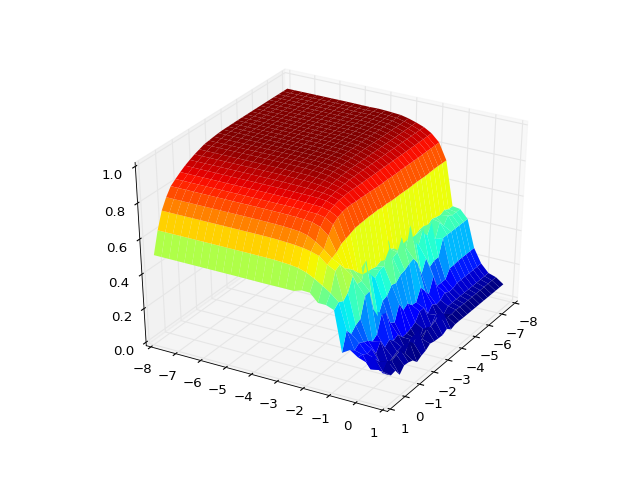

In [38]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

reg_figure = plt.figure()
reg_plot = reg_figure.gca(projection='3d')

X = np.arange(-3, 3, 0.15)
Y = np.arange(-10, 10, 0.15)
reg_plot.view_init(33, 30)

reg_plot.plot_surface(
    *np.meshgrid(lambda_range,
    lambda_range),
    accuracies,
    rstride=1,
    cstride=1,
    cmap=cm.get_cmap('jet', 200),
    linewidth=0,
    antialiased=True
)

reg_figure.show()

Видно, что лучшие решения получаются при минимальном ($10^{-8}$) влиянии регуляризаторов. Видимо, под нашу задачу они не подходят, что тут поделать.

**Задание**
1. Предложите значения $w$ и $b$, чтобы $y$ реализовала операторы *and*, *or*, *not*.
2. Приведите пример булевой функции, которая не может быть представлена в виде $y$?

##### Реализуемые функции:

\begin{itemize}
\item $\texttt{and}$:
  $w = (1, \ldots, 1),\ b = -n+0.5$
  
  $$\theta(wx+b) = \theta\left(\sum x_i - n + 0.5\right)$$
  
  Очевидно, что только при $x = (1, \ldots, 1)$ $\sum x_i + 0.5 > n$.
\item $\texttt{or}$:
  $w = (1, \ldots, 1),\ b = -0.5$
  
  $$\theta(wx+b) = \theta\left(\sum x_i - 0.5\right)$$
  
  Очевидно, что только при $x = (0, \ldots, 0)$ $\sum x_i - 0.5 < 0$.
\item $\texttt{not}$:
  $w = -E ,\ b = 0.5E$
  
  $$\theta(wx+b) = \theta\left(\begin{pmatrix}0.5 - x_1\\\vdots\\0.5 - x_i\\\vdots\\0.5 - x_n\end{pmatrix}\right)$$
  
  Очевидно, что $0.5-x = \overline{x}$.

\end{itemize}

(я только сейчас понял, что случайно решил для общего случая, но пусть будет)

##### Нереализуемые функции:

Например, $\texttt{xor}$. Ясно, что $wx+b$ даёт нам некоторое линейное преобразование; из линейности преобразования $f$ следует, что $f\left(\frac{a+b}{2}\right) = \frac{f(a) + f(b)}{2}$. Однако:

\begin{itemize}
  \item
  $
    f\left(\begin{pmatrix}0.5\\0.5\end{pmatrix}\right) =
    f\left(\frac{\begin{pmatrix}0\\0\end{pmatrix}+\begin{pmatrix}1\\1\end{pmatrix}}{2}\right) =
    \frac{
     \overbrace{f\left(\begin{pmatrix}0\\0\end{pmatrix}\right)}^{< 0.5} 
    +\overbrace{f\left(\begin{pmatrix}1\\1\end{pmatrix}\right)}^{< 0.5}}{2} < \frac{1}{2}
  $
  \item
  $
    f\left(\begin{pmatrix}0.5\\0.5\end{pmatrix}\right) =
    f\left(\frac{\begin{pmatrix}1\\0\end{pmatrix}+\begin{pmatrix}0\\1\end{pmatrix}}{2}\right) =
    \frac{
     \overbrace{f\left(\begin{pmatrix}1\\0\end{pmatrix}\right)}^{> 0.5} 
    +\overbrace{f\left(\begin{pmatrix}0\\1\end{pmatrix}\right)}^{> 0.5}}{2} > \frac{1}{2}
  $
\end{itemize}

Противоречие.

**Задание**
1. Можете ли вы теперь представить вашу функцию в виде $y$?
2. Может ли $y$ реализовать произвольную булеву функцию? Знаете ли вы, что такое ДНФ?

Давайте сразу решать общий случай:

Да, может. Вспомним (вернее, ещё не забыли), что мы можем сделать "И", "ИЛИ" и "НЕ" с помощью линейных преобразований; заметим также, что линейная комбинация операций "НЕ" и "И" тоже линейна; значит, мы можем с помощью внутреннего преобразования "создать" конъюнкты, а помощью внешнего соединить их дизъюнкциями. Получим ДНФ, а значит, и любую бинарную функцию.

# Keras

А теперь поработаем без палок и верёвок; используем умный и удобный Keras:

**Задание**

2. Реализуйте двухслойную сеть, где в качестве нелинейной функции используется [ReLu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks).
3. Улучшилось ли качество в сравнении с предыдущей моделью?
4. Какова размерность выходного вектора после первого линейного преобразования? Как влияет его размер? Постройте график.
5. Предложите свою архитектуру
6. Как зависит качество от количества слоев? Постройте график.
7. Попробуйте постепенно добавлять слои в вашу сеть, для это изучите следующие трюки:
 * [Autoencoder](https://en.wikipedia.org/wiki/Autoencoder)
 * [RBM](https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine)

In [12]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Merge
from keras.layers.normalization import BatchNormalization
from keras.layers.noise import GaussianDropout, GaussianNoise
from keras.optimizers import Adam, Adadelta, RMSprop
from keras.utils import np_utils

np.random.seed(1337)  # for reproducibility

Не будем изобретать велосипед и воспользуемся шаблоном из примера от Keras, изменив его под наши нужды. Нам всего-то нужно два Dense слоя с перемежающими их активациями --- ReLu в середине и softmax на выходе:

In [13]:
batch_size = 512
epoch_number = 10

layers = [
    Dense(512, input_shape=(784,)),
    Activation('relu'),
    Dense(classes_num),
    Activation('softmax'),
]

simple_model = Sequential(layers)

simple_model.summary()

simple_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history = simple_model.fit(
    digits,
    labels,
    batch_size=batch_size,
    nb_epoch=epoch_number,
    verbose=0,
    validation_data=(test_digits, test_labels)
)

score = simple_model.evaluate(test_digits, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 512)           401920      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 512)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            5130        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 407050
______________________________________________________________________

Даже такая довольно нехитрая сеть обходит по точности нашу рукописную, а ведь она ещё и реализуется проще. А что вообще можно выжать из такой простой архитектуры? Можно варьировать размер скрытого слоя, например, или размер батча. Интуитивно, впрочем, кажется, что при большинстве размеров батча ничего принципиально не должно меняться --- разве что, на очень малых размерах будет гораздо медленнее считаться. А вот размер слоя может оказывать большее влияние. Попробуем построить график точности от размера скрытого слоя:

In [14]:
batch_size = 512
classes_number = 10
epoch_number = 10
max_size = 10

hidd_losses = np.zeros((max_size))
hidd_accuracies = np.zeros((max_size))

for i in range(0, max_size):
    print(i, end="... ")
    layers = [
        Dense(2**i, input_shape=(784,)),
        Activation('relu'),
        Dense(classes_number),
        Activation('softmax'),
    ]

    comp_model = Sequential(layers)

    comp_model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )

    history = comp_model.fit(
        digits,
        labels,
        batch_size=batch_size,
        nb_epoch=epoch_number*(i+1),
        verbose=0,
        validation_data=(test_digits, test_labels)
    )

    score = comp_model.evaluate(test_digits, test_labels, verbose=0)
    hidd_losses[i] = score[0]
    hidd_accuracies[i] = score[1]

0... 1... 2... 3... 4... 5... 6... 7... 8... 9... 

<IPython.core.display.Javascript object>


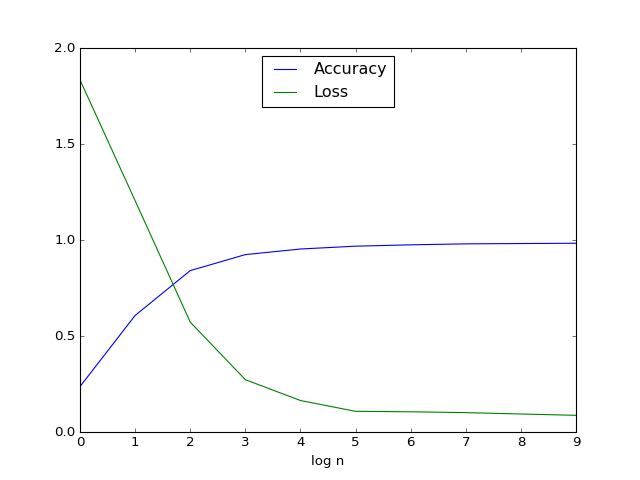

In [42]:
size_figure = plt.figure()
size_plot = size_figure.add_subplot(111)
size_plot.set_xlabel("log n")

X = np.arange(0, max_size)

size_plot.plot(
    X,
    hidd_accuracies,
    linewidth=1,
    antialiased=True,
    label="Accuracy"
)
size_plot.plot(
    X,
    hidd_losses,
    linewidth=1,
    antialiased=True,
    label="Loss"
)

size_plot.legend(loc="upper center")

size_figure.show()

Видно, что прирост точности сильно замедляется с ростом размерности скрытого слоя.

А теперь придумаем чуть более сложную архитектуру и пообучаем её подольше; это должно позволить нам добиться ещё большей точноcти:

In [16]:
batch_size = 512
nb_classes = 10
nb_epoch = 150

initial_layers = [
    Dense(512, input_shape=(784,)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512),
    Activation('relu'),
    BatchNormalization(),
]

out = [
    Dense(10),
    Activation('softmax')
]

model = Sequential(initial_layers + out)

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

history = model.fit(
    digits,
    labels,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    verbose=2,
    validation_data=(test_digits, test_labels)
)

score = model.evaluate(test_digits, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_23 (Dense)                 (None, 512)           401920      dense_input_12[0][0]             
____________________________________________________________________________________________________
activation_23 (Activation)       (None, 512)           0           dense_23[0][0]                   
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 512)           1024        activation_23[0][0]              
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 512)           0           batchnormalization_1[0][0]       
___________________________________________________________________________________________

$98.8\%$! Неплохо; обучается небыстро, правда.

Мы уже смотрели, как зависит качество от размера скрытого слоя; а давайте теперь поменяем число самих слоёв?

In [45]:
batch_size = 512
classes_number = 10
epoch_number = 20
max_size = 10

hidd_num_losses = np.zeros((max_size))
hidd_num_accuracies = np.zeros((max_size))

for i in range(0, max_size):
    print(i, end="... ")
    layers = [
        Dense(512, input_shape=(784,)),
        Activation('relu')
    ]
    
    for _ in range(i):
        layers += [
            Dense(512),
            Activation('relu')
        ]
    
    layers += [
        Dense(classes_number),
        Activation('softmax'),
    ]

    comp_model = Sequential(layers)

    comp_model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )

    history = comp_model.fit(
        digits,
        labels,
        batch_size=batch_size,
        nb_epoch=min(epoch_number*(i+1), 100),
        verbose=0,
        validation_data=(test_digits, test_labels)
    )

    score = comp_model.evaluate(test_digits, test_labels, verbose=0)
    hidd_num_losses[i] = score[0]
    hidd_num_accuracies[i] = score[1]

0... 1... 2... 3... 4... 5... 6... 7... 8... 9... 

<IPython.core.display.Javascript object>


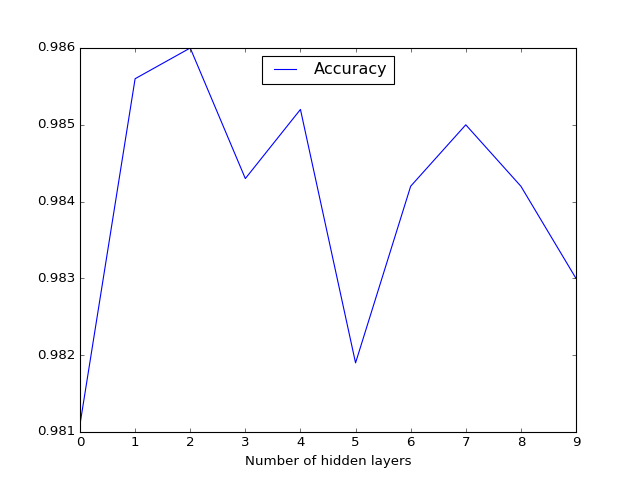

In [46]:
hidden_num_figure = plt.figure()
hidden_num_plot = hidden_num_figure.add_subplot(111)
hidden_num_plot.set_xlabel("Number of hidden layers")

X = np.arange(0, max_size)

hidden_num_plot.plot(
    X,
    hidd_num_accuracies,
    linewidth=1,
    antialiased=True,
    label="Accuracy"
)

hidden_num_plot.legend(loc="upper center")

hidden_num_figure.show()

Что-то странное; впрочем, ясно, что больше слоёв, во-первых, не улучшают ситуацию, а во-вторых, сильно ухудшают скорость обучения.

## Автоэнкодеры

Напоследок поэкспериментируем с автоэнкодерами:

In [57]:
def visualise(orig, model, n = 10):
    decoded = model.predict(orig[:n])
    draw = plt.figure(figsize=(10, 2))
    for i in range(n):
        ax = draw.add_subplot(2, n, i + 1)
        ax.imshow(orig[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = draw.add_subplot(2, n, i + 1 + n)
        ax.imshow(decoded[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    draw.show()

In [53]:
batch_size = 256
nb_epoch = 100

coding_layers = [
    Dense(128, input_shape=(784,)),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(32),
    Activation('relu')
]

decoding_layers = [
    Dense(64),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(784),
    Activation('sigmoid')
]

autoencoder = Sequential(coding_layers + decoding_layers)

autoencoder.compile(
    loss='binary_crossentropy',
    optimizer=Adadelta()
)

history = autoencoder.fit(
    digits,
    digits,
    shuffle=True,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    verbose=2,
    validation_data=(test_digits, test_digits)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
4s - loss: 0.3543 - val_loss: 0.2645
Epoch 2/100
3s - loss: 0.2597 - val_loss: 0.2543
Epoch 3/100
3s - loss: 0.2458 - val_loss: 0.2392
Epoch 4/100
3s - loss: 0.2306 - val_loss: 0.2222
Epoch 5/100
4s - loss: 0.2162 - val_loss: 0.2084
Epoch 6/100
4s - loss: 0.2055 - val_loss: 0.1991
Epoch 7/100
4s - loss: 0.1943 - val_loss: 0.1890
Epoch 8/100
3s - loss: 0.1862 - val_loss: 0.1810
Epoch 9/100
4s - loss: 0.1791 - val_loss: 0.1744
Epoch 10/100
3s - loss: 0.1732 - val_loss: 0.1687
Epoch 11/100
4s - loss: 0.1682 - val_loss: 0.1647
Epoch 12/100
4s - loss: 0.1638 - val_loss: 0.1605
Epoch 13/100
4s - loss: 0.1601 - val_loss: 0.1580
Epoch 14/100
4s - loss: 0.1572 - val_loss: 0.1551
Epoch 15/100
4s - loss: 0.1546 - val_loss: 0.1511
Epoch 16/100
4s - loss: 0.1519 - val_loss: 0.1499
Epoch 17/100
4s - loss: 0.1492 - val_loss: 0.1449
Epoch 18/100
4s - loss: 0.1461 - val_loss: 0.1438
Epoch 19/100
4s - loss: 0.1437 - val_loss: 0.1411
Epoch 20/

<IPython.core.display.Javascript object>


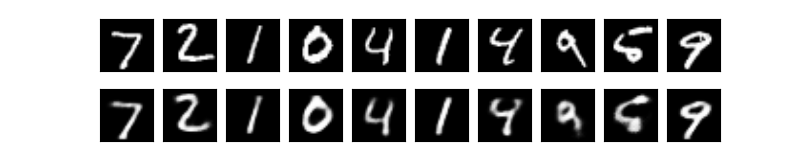

In [61]:
visualise(test_digits, autoencoder, 10)

А теперь самое интересное --- ведь автоэнкодер научился извлекать какие-то фичи; почему бы не основать на этом ещё одну сеть?

In [63]:
for l in coding_layers:
    l.trainable = False

batch_size = 1024
nb_epoch = 200

processing_layers = [
    Dense(128),
    Activation('relu'),
    BatchNormalization(),
    Dense(512),
    Activation('relu'), 
    BatchNormalization(),
    Dense(128),
    Activation('relu'), 
    BatchNormalization(),
    Dense(classes_num),
    Activation('softmax')
]

encoder_model = Sequential(coding_layers+processing_layers)

encoder_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

encoder_model.fit(
    digits,
    labels,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    verbose=2,
    validation_data=(test_digits, test_labels)
)

score = encoder_model.evaluate(test_digits, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
4s - loss: 0.3713 - acc: 0.8862 - val_loss: 0.1619 - val_acc: 0.9496
Epoch 2/200
2s - loss: 0.1315 - acc: 0.9611 - val_loss: 0.1249 - val_acc: 0.9649
Epoch 3/200
3s - loss: 0.0932 - acc: 0.9716 - val_loss: 0.0972 - val_acc: 0.9727
Epoch 4/200
3s - loss: 0.0722 - acc: 0.9780 - val_loss: 0.0915 - val_acc: 0.9740
Epoch 5/200
3s - loss: 0.0595 - acc: 0.9823 - val_loss: 0.0844 - val_acc: 0.9745
Epoch 6/200
3s - loss: 0.0487 - acc: 0.9857 - val_loss: 0.0802 - val_acc: 0.9756
Epoch 7/200
3s - loss: 0.0426 - acc: 0.9874 - val_loss: 0.0714 - val_acc: 0.9789
Epoch 8/200
2s - loss: 0.0355 - acc: 0.9897 - val_loss: 0.0725 - val_acc: 0.9789
Epoch 9/200
2s - loss: 0.0289 - acc: 0.9919 - val_loss: 0.0691 - val_acc: 0.9779
Epoch 10/200
2s - loss: 0.0254 - acc: 0.9935 - val_loss: 0.0697 - val_acc: 0.9784
Epoch 11/200
2s - loss: 0.0194 - acc: 0.9954 - val_loss: 0.0690 - val_acc: 0.9782
Epoch 12/200
2s - loss: 0.0168 - acc: 0.9957 - val_loss: 

Работает! Да ещё и довольно неплохо при этом

А ещё можно посмотреть на то, как устроен наш автоэнкодер. Для этого изобразим веса нейронов первого (ну или последнего) слоя. Т.к. они работают непоредственно с изображениями, во-первых, в них ещё прослеживается структура данных, а во-вторых, они имеют нужную нам размерность.

<IPython.core.display.Javascript object>


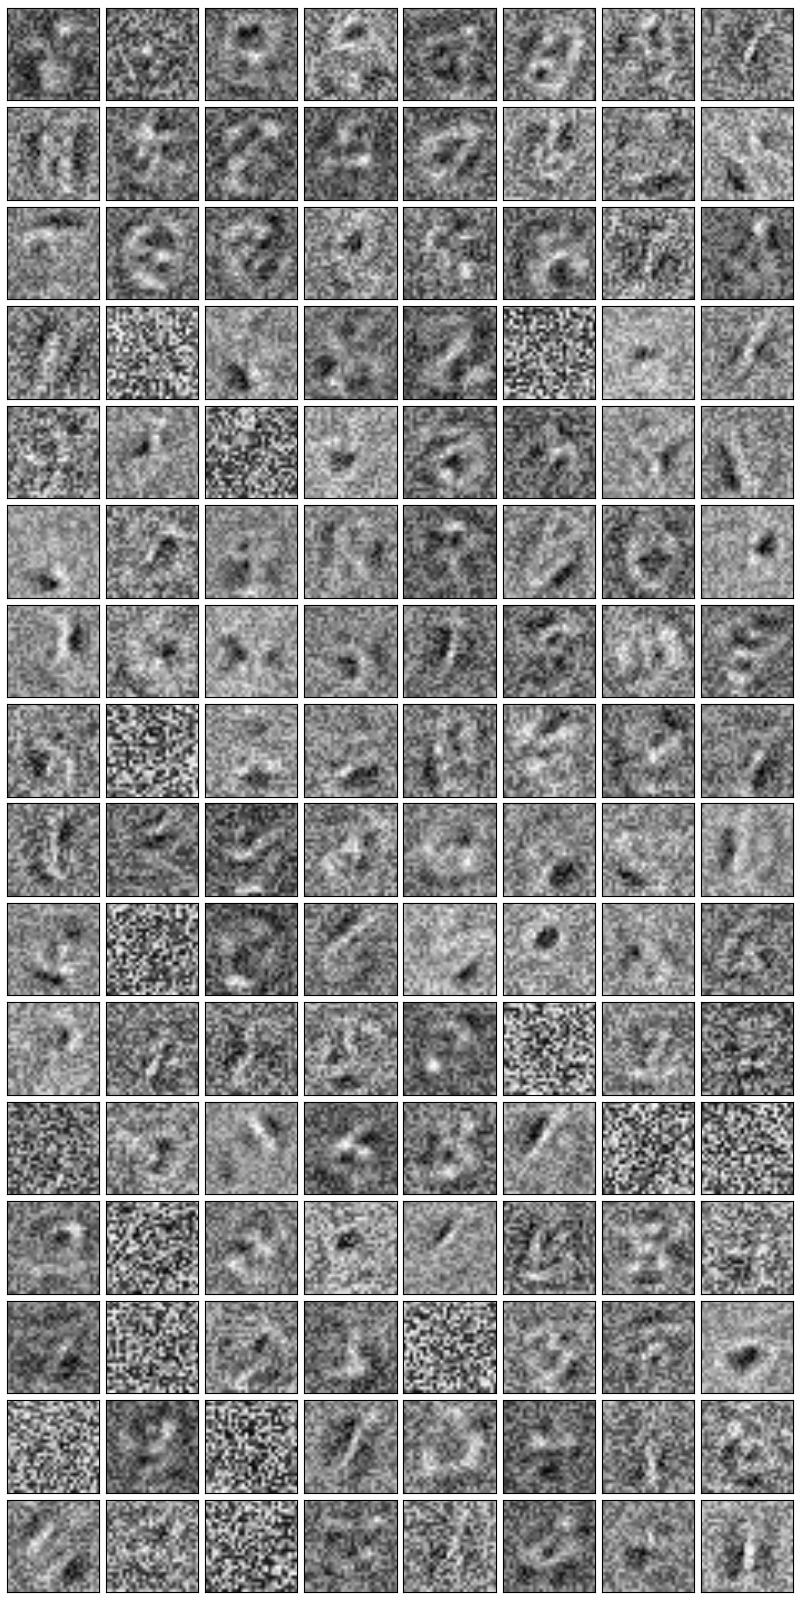

In [120]:
draw_layer = plt.figure(figsize=(10, 20))
for i in range(128):
    ax = draw_layer.add_subplot(16, 8, i + 1)
    ax.imshow(autoencoder.layers[0].get_weights()[0][:,i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
draw_layer.tight_layout(pad=0.5)
draw_layer.show()

И действительно, явно прослеживаются фрагменты цифр! Проследить что-то осмысленное, разумеется, не получится, но красиво.